## Комплексный анализ данных о продажах компьютерных игр

### Описание проекта

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from matplotlib.pyplot import figure

### Импорт и предобработка данных

In [2]:
pd.set_option('display.max_columns', None)

df_games = pd.read_csv('/datasets/games.csv', sep=',')
display(df_games)
df_games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработаем пропуски и преобразуем типы данных

In [3]:
df_games.columns = df_games.columns.str.lower() #приведем названия столбцов к нижнему регистру
display(df_games.head())
print(df_games.isna().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


<div class="alert alert-info">
    Пропуски в рейтинге вероятно обусловлены отсутствием оценки данным рейтинговым агентством либо давностью релиза игры, их можно значением no rate, ввиду отсутствия оценки будет объективным
    
</div>

In [4]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [5]:
df_games['rating'] = df_games['rating'].fillna('no rate')

<div class="alert alert-info">
    Чтобы заполнить пропуски в столбце "user_score", необходимо преобразовать тип данных вo float (единственный столбец, который нам необходимо преобразовать для дальнейшего анализа).

Для начала проверим уникальные значения
</div>

In [6]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div class="alert alert-info">
    Присутствует строчное значение "tbd", возможно это игры по которым не удалось сформировать или выгрузить данные по средней пользовательской оценке. Заполнить его можно отрицательным числовым значением для дальнейшей работы в числовом формате.
</div>

In [7]:
df_games = df_games.replace({'tbd':-1})
df_games['user_score'].astype(float)
# пропуски оставим, т.к. их слишком много и заполнить приемлемым значением не можем. будм фильтровать где нужно

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

In [8]:
df_games['critic_score'] = df_games['critic_score'].fillna(df_games.groupby('genre')['critic_score'].transform('median'))
# столбец с оценкой критиков также заполним медианным значением по жанру

In [9]:
df_games['name'] = df_games['name'].dropna() # пропусков мало, их можно удалить
df_games['genre'] = df_games['genre'].dropna()

In [10]:
print(df_games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          2
user_score         6701
rating                0
dtype: int64


<div class="alert alert-info">
    Пропуски в годе релиза оставим, т.к. нет приемлемого значения для их заполнения, плюс их количество незначительно для дальнейшего анализа.

Добавим столбец с суммарными продажами по всем регионам
</div>

#### Добавим столбец с суммарными продажами

In [11]:
df_games['sum_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,NaN,no rate,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,no rate,31.38


### Проведем исследовательский анализ

#### Распределение релизов по годам

<AxesSubplot:>

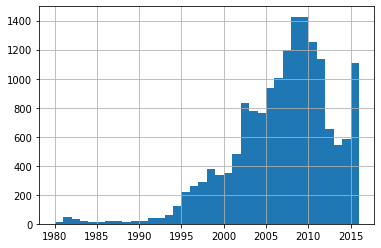

In [12]:
df_games['year_of_release'].hist(bins=36)

<div class="alert alert-info">
Период с 1980 по 1990 наименее важен, за этот период очень мало данных и трудно выделить тренды, ведь в то время каждая игра была как открытие, а возможность поиграть - привилегией.
    
В некоторые года, периодически, релизов практически нет.
    
Выделим за актуальный период 2014-2016 гг., т.к. в индустрии современных все очень быстро меняется, плюс по резкому снижению релизов к 2012 году заметно, что производители стали выпускать меньше, но качественней. Ведь аудитория стала более избирательна, начался бум сетевых игр и у производителей было больше каналов для монетизации и пользователей.
</div>

#### Выделим актуальный период для дальнейшего исследования

In [13]:
df_games_actually = df_games[df_games['year_of_release'] > 2013]
display(len(df_games_actually['year_of_release']))

1689

<div class="alert alert-info">
    Вполне достаточно для репрезентативной выборки
</div>

#### Выделим топ-платформ и проанализируем их данные

In [14]:
display(df_games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False).head(10))

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


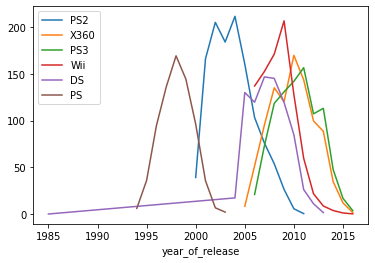

In [15]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for i in top_platforms:
    df_games.query('platform == @i').groupby('year_of_release')['sum_sales'].sum().plot()
    plt.legend(top_platforms)

In [16]:
df_games[df_games['platform'] == 'DS']['year_of_release'].unique() # у платформы DS странный хвост, похоже на аномалию

array([2006., 2005., 2010., 2009., 2004., 2007., 2012., 2008., 2011.,
         nan, 2013., 1985.])

<div class="alert alert-info">
    У платформы DS в данных закралась ошибка в дате релиза 1985 год, такого быть не может, ее релиз состоялся в 2004. Мы учтем это при анализе.
    
По данным о суммарных продажах по платформам мы видим, что в среднем платформы имеют продажи от 8 до 10 лет. Это логично, ведь производители игр и приставок периодически, каждые 10 лет, обновляют качество разработки и графики игр, а также соответственно "железо" на игровых консолях и минимальные требования к десктопам.
</div>

In [17]:
display(df_games_actually.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False).head(10))

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


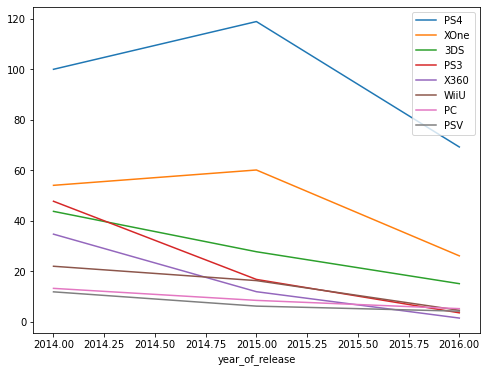

In [18]:
top_platforms_actually = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV']
for i in top_platforms_actually:
    df_games_actually.query('platform == @i').groupby('year_of_release')['sum_sales'].sum().plot(x='years_of_release', y='sum_sales', figsize=(8, 6))
    plt.legend(top_platforms_actually)

<div class="alert alert-info">
    По продажам за актуальный период можно выделить топ-3 платформ (PS4, XOne и 3DS) с достаточно высоким уровнем продаж, указывающим что пик этих платформ еще не прошел. За данный период у всех платформ наблюдается спад продаж, за исключением PC, который всегда актуален в силу своей универсальности и распространенности.
</div>

#### Проанализируем распределение и выбросы

(0.0, 5.0)

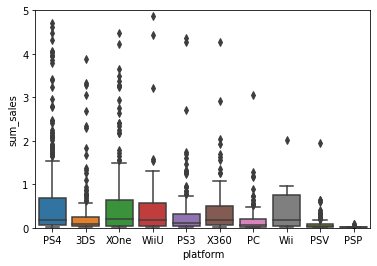

In [19]:
sns.boxplot(data = df_games_actually, y = 'sum_sales', x = 'platform')
plt.ylim(0, 5)



- вытянутый "правый ус" и количество выбросов к максимальным значениям у платформ говорит о наличии игр-хитов продаж. Больше всего их у вышеупомянутого топа-3 и их предшествующих версий. 
- у платформы Wii и WiiU таких хитов в разы меньше, однако объемы их продаж стабильны как у топов. 
- у платформы PC хитов в несколько раз больше, но при этом объем продаж значительно меньше чем у топов и Wii.
- PSP на данный период практически утратила свою популярность и продажи.


#### Оценим влияние оценок пользователей и критиков на продажи

In [20]:
df_games_actually = df_games_actually[df_games_actually['user_score'] != -1] # предварительно отфильтруем значение -1

Коэффициент корреляции по отзывам критиков: 0.34501774838308114
Коэффициент корреляции по отзывам пользователей: 0.11018824489046782


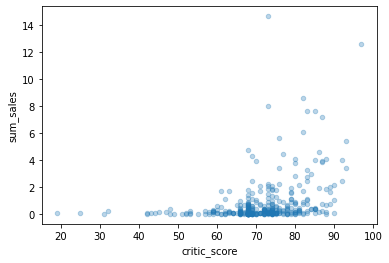

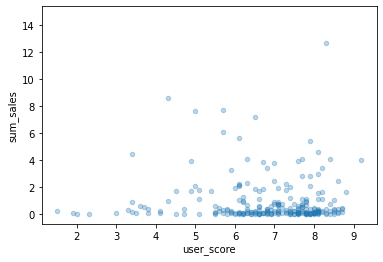

In [21]:
df_games_actually.query('platform == "PS4"').plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3)
df_games_actually.query('platform == "PS4"').plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3)
print('Коэффициент корреляции по отзывам критиков:', df_games_actually.query('platform == "PS4"')['critic_score'].corr(df_games_actually['sum_sales']))
print('Коэффициент корреляции по отзывам пользователей:', df_games_actually.query('platform == "PS4"')['user_score'].notna().corr(df_games_actually['sum_sales']))

<div class="alert alert-info">
    У платформы "PS4" наблюдается небольшая прямая корреляция высокой оценки и высоких продаж по оценкам критиков, по пользовательскому рейтингу корреляции практически нет. При этом релизы, имеющие оценку критиков менее 60 и пользовательский рейтинг менее 4 практически не достигают высоких продаж. 
    
    Коэффициенты корреляции говорят об отсутствии зависимости продаж от рейтингов
</div>

Коэффициент корреляции по отзывам критиков: 0.3888838036128578
Коэффициент корреляции по отзывам пользователей: 0.0958623193205179


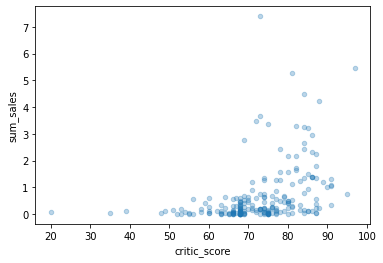

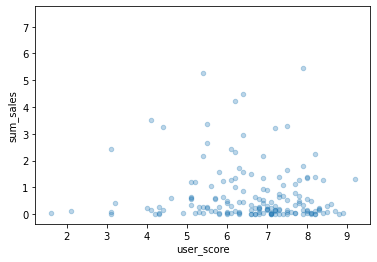

In [22]:
df_games_actually.query('platform == "XOne"').plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3)
df_games_actually.query('platform == "XOne"').plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3)
print('Коэффициент корреляции по отзывам критиков:', df_games_actually.query('platform == "XOne"')['critic_score'].corr(df_games_actually['sum_sales']))
print('Коэффициент корреляции по отзывам пользователей:', df_games_actually.query('platform == "XOne"')['user_score'].notna().corr(df_games_actually['sum_sales']))

<div class="alert alert-info">
    У платформы "XOne" наблюдается более выраженная прямая корреляция высокой оценки и высоких продаж по оценкам критиков, но менее выраженная по пользовательскому рейтингу. Релизы, имеющие оценку критиков менее 70 практически не достигают высоких продаж, а по пользовательским рейтингам уже оценка 4 и выше позволяет выйти в топ. Из этого следует, что оценки критиков слабо, но влияют на выбор пользователей при покупке игры. Возможно меньшая зависимость от оценки пользователей на данной платформе говорит о значительно меньшей базе обзоров и рейтингов для игр на платформе XOne.
    
    По коэффициенту корреляции пользовательские оценки на продажи платформы не влияют.
</div>

Коэффициент корреляции по отзывам критиков: 0.163244954485537
Коэффициент корреляции по отзывам пользователей: 0.02143383400832079


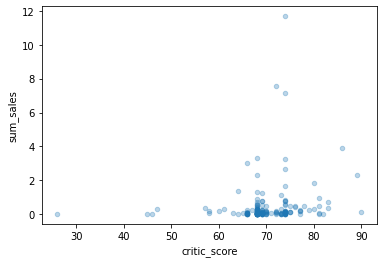

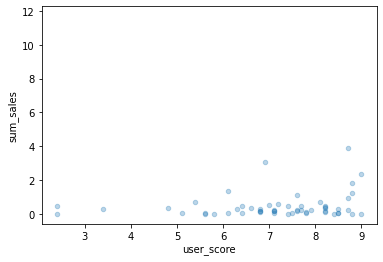

In [23]:
df_games_actually.query('platform == "3DS"').plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3)
df_games_actually.query('platform == "3DS"').plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3)
print('Коэффициент корреляции по отзывам критиков:', df_games_actually.query('platform == "3DS"')['critic_score'].corr(df_games_actually['sum_sales']))
print('Коэффициент корреляции по отзывам пользователей:', df_games_actually.query('platform == "3DS"')['user_score'].notna().corr(df_games_actually['sum_sales']))

<div class="alert alert-info">
    У платформы "3DS" семейства Nintendo, разработанной для портативных консолей наблюдается крайне слабая корреляции уровня оценки и высоких продаж, как и по оценкам критиков, так и по пользовательскому рейтингу. Релизы с высокой оценкой точечно становятся хитами продаж, но в основном распределение нормальное, с низкими продажами при низких оценках. Из этого следует, что оценки не влияют на выбор пользователей при покупке игры, то же характерно для мобильных платформ. Ведь пользователи мобильных устройств чаще пробуют новые игры без предварительной оценки, а также среди таких пользователей довольно много детей младшего возраста, которым и вовсе не важны оценки.
    
    Корреляция по пользовательским рейтингам у данной платформы практически нулевая.
</div>

Соотношение по данным всего актуального периода
Общий коэффициент корреляции по отзывам критиков: 0.281925828354397
Общий коэффициент корреляции по отзывам пользователей: 0.14288371716319181


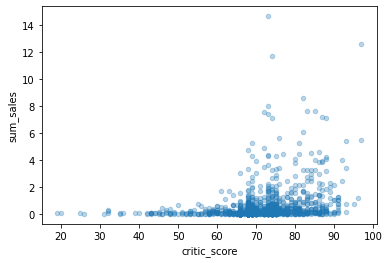

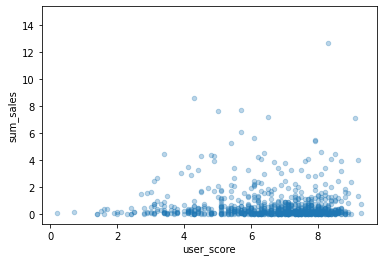

In [24]:
print('Соотношение по данным всего актуального периода')
df_games_actually.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3)
df_games_actually.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3)
print('Общий коэффициент корреляции по отзывам критиков:', df_games_actually['critic_score'].corr(df_games_actually['sum_sales']))
print('Общий коэффициент корреляции по отзывам пользователей:', df_games_actually['user_score'].notna().corr(df_games_actually['sum_sales']))

<div class="alert alert-info">
    По всем платформам наблюдается слабая прямая корреляция высокой оценки и высоких продаж по оценкам критиков, по пользовательскому рейтингу почти все платформы показывают отсутствие зависимости продаж от оценки. На пользовательскую корреляцию также влияет значительная доля мобильных платформ, где значительному сегменту игроков неважно какая оценка у скачиваемой игры. 
    
    Общий вывод: безусловно присутсвуют пользователи, ктр ориентируются на рейтинги и оценки критиков. Однако высокие продажи формируются хитами одного релиза и серийными играми - флагманами продаж. Такие релизы анонсируются за год вперед, и их ожидают уже после прохождения предыдущей части. В таких случаях пользователи оценки принимают лишь как дополнительную информацию.
</div>

#### Распределение продаж по жанрам

genre
Action          579
Adventure       176
Fighting         58
Misc            101
Platform         34
Puzzle           10
Racing           66
Role-Playing    221
Shooter         123
Simulation       40
Sports          151
Strategy         37
Name: name, dtype: int64

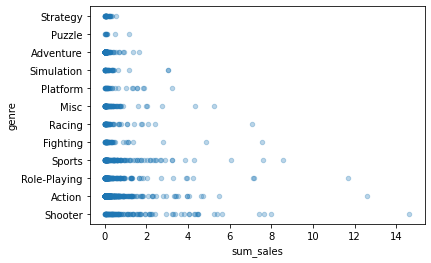

In [25]:
df_games_actually.plot(x='sum_sales', y='genre', kind='scatter', alpha=0.3)
display(df_games_actually.groupby('genre')['name'].count())

- Распределение продаж по жанрам показывает явное преобладание шутеров и жанра action по объемам продаж и популярности, затем идут ролевые игры и спорт, также можно выделить в топ файтинг и гонки. 
    
- Среди шутеров много хитов(CS Go, Call of Duty, Halo и др.) неудивительно что жанр лидирует, также игры этого жанра наиболее универсальны по платформам, в них удобно играть как на консолях, так и на десктопах и мобильных устройствах.
   
- Аction также обладает универсальностью, особой увлекательностью и завлекающими сюжетами в основном за счет повествовательной основы и наиболее реалистичной графики.
    
- Ролевые игры имеют свой сегмент пользователей за своих особенностей жанра, а также универсальностью к платформам. Часто имею длительный и многосценарный сюжет, либо и вовсе не имеют его. Жанр имеет свою нишу и уровень продаж держится в силу вышеперечисленных особенностей.
    
- Жанр спорт также имеет свой сегмент пользователей и особенности геймплея на некоторых платформах, и всегда будет иметь свой объем продаж на рынке.
    
- Файтинг и гонки можно также выделить как жанры со своими уникальными свойствами и аудиторией, имеющей значительную долю среди пользователей, в т.ч. передовые достижения в области графики. Жанр Гонки тесно связан с автомобильным рынком, и производители игр имеют массу спонсоров в разработке и продвижении игр.
    
- Остальные жанры имеют меньший объем продаж в силу специфики и популярности жанра, соответственно меньший объем аудитории, платформ и устройств.
    
- Общий вывод: жанр безусловно имеет влияние на объем продаж, в первую очередь из-за доли поклонников определенного жанра, во-вторых каждый жанр имеет свою степень популярности в силу своих спефицических свойств и кроссплатформенности.

- Action, Shooter, Role-Playing, Sports имеют более 100 релизов, что соответствует высокому уровню продаж.

- Жанры Misc и Adventure несмотря на большое количество релизов показывают относительно малые объемы продаж.

### Составим портрет пользователя по регионам NA,EU & JP

#### Предпочтения по платформам и жанрам

<AxesSubplot:ylabel='na_sales'>

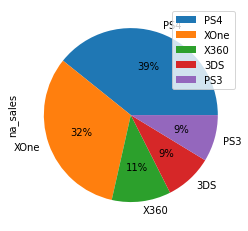

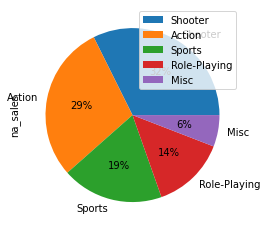

In [26]:
df_games_actually.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', autopct='%1.0f%%')
df_games_actually.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', autopct='%1.0f%%')

- пользователи в Северной Америке предпочитают PS4 и XOne, доля более 70%, это логично, ведь последние являются новинками. 
- меньшую долю 9 и 11 процентов занимают их предыдущие версии PS3 и X360, ктр уже прошли свой пик продаж, их покупают в основном те, кто еще не обновил консоль либо предпочитает игры старой версии. 
- замыкает пятерку платформа Nintendo 3DS со значительной долей игр жанров Sports и Role-Playing.

- жанровые предпочтения североамериканцев возглавляют с долей 61% от продаж Action и Shooter, не удивительно, ведь они составляют основу жанров платформ PS и XBox.
- 3 место по популярности с долей 19% занимает жанр Sports
- далее пятерку предпочтений закрывают ролевые игры и смешанные жанр с долей 14 и 6% соответсвенно

<AxesSubplot:ylabel='eu_sales'>

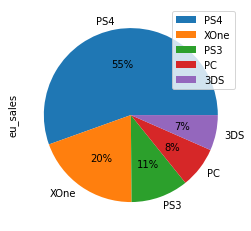

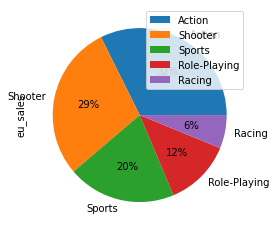

In [27]:
df_games_actually.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', autopct='%1.0f%%')
df_games_actually.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', autopct='%1.0f%%')

- пользователи в Европе в большей степени (55% + 11% PS3) предпочитают платформу PS.  
- XOne занимает долю 20% при том, что более старая версия X360 уже не в топе у европейского пользователя
- остальные 15% продаж из топа составляют платформы PC и 3DS, последние наименее предпочтительны в еврозоне.

- жанровые предпочтения европейцев практически схожи с североамериканскими с отличием, замыкающего топ жанра Racing. Европейцы гонки любят больше, чем американцы.

<AxesSubplot:ylabel='jp_sales'>

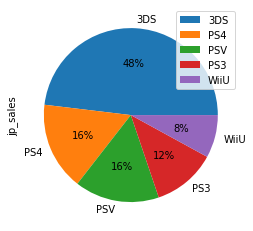

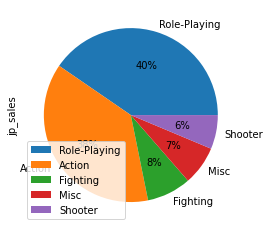

In [28]:
df_games_actually.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', autopct='%1.0f%%')
df_games_actually.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', autopct='%1.0f%%')

- японцы сильно отличаются в предпочтениях, их топ возглавляет Nintendo 3DS 48% + 8% предыдущая версия WiiU. Тоже не удивительно, японцы создавали платформу для себя, и выпускали популярные игры в первую очередь под нее.
- платформы PS4 и PS3 занимают треть от топа продаж в регионе, плюс значительную долю 16% занимает портативная PSV, которая не присутствует в топе предыдущих регионов.

- жанровые предпочтения японцев также отличны от европейских и североамериканских. Здесь преобладает с долей 40% Ролевые игры, и 38% Action
- жанр Fighting предпочитают 8%, ктр отсутствует в топе предыдущих регионов
- остальные 6 и 7% топа занимают Смешанный жанр и Shooter.

- японцы, как создатели наиболее популярных платформ PS и Nintendo формируют свою оригинальную картину препочтений.

#### Распределение продаж по рейтингу ESRB в регионах

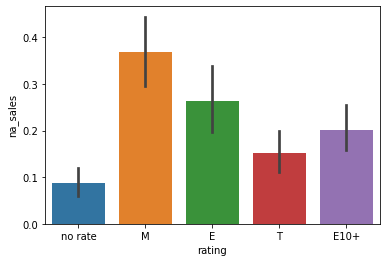

In [29]:
ax = sns.barplot(x='rating', y='na_sales', data=df_games_actually)

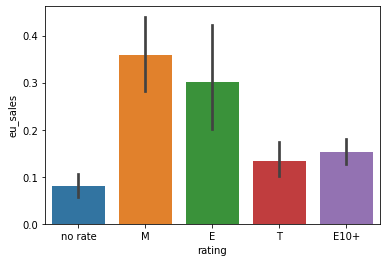

In [30]:
ax = sns.barplot(x='rating', y='eu_sales', data=df_games_actually)

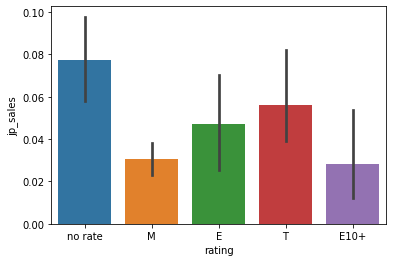

In [31]:
ax = sns.barplot(x='rating', y='jp_sales', data=df_games_actually)

<div class="alert alert-info">
    В Северной Америке большей популярностью пользуются рейтинг М(от 17 лет) и без рейтинга, далее для всех Е, Т и Е10+. Т.е. чем выше ограничение по возрастной категории аудитории, тем более популярна игра.

В Европейском регионе продажи от рейтингов слабо различаются, только Е10+ отличается более низкими продажами.

В Японии наибольший объем продаж имеют релизы без рейтинга, вероятней всего последние не попадают по оценку рейтингового агентства, которое ориентировано больше на Европу и Северную Америку. Остальные рейтинги схожи по объемам продаж.
    </div>

## Проверим гипотезы

### Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются

#### Проверку гипотезы осуществим с помощью t-testa для двусторонней гипотезы, т.к. нас интересует лишь равентсво, либо его отсутствие.

In [32]:
xone_rate = df_games_actually[df_games_actually['platform'] == 'XOne']['user_score'].notna()
pc_rate = df_games_actually[df_games_actually['platform'] == 'PC']['user_score'].notna()

alpha = .05 # критический уровень статистической значимости
            

results = st.ttest_ind(
    xone_rate, 
    pc_rate)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.08444718554148302
Не получилось отвергнуть нулевую гипотезу


In [33]:
print('Средние показатели рейтингов платформ XOne и PC:')
print(df_games_actually[df_games_actually['platform'] == 'XOne']['user_score'].notna().mean())
print(df_games_actually[df_games_actually['platform'] == 'PC']['user_score'].notna().mean())


Средние показатели рейтингов платформ XOne и PC:
0.7603686635944701
0.8356164383561644


<div class="alert alert-info">
    Нулевая гипотеза о сравнении пользовательских рейтингов данных платформ выбраны ввиду их принципиальной схожести как по геймплею, так и по разной аудитории. Релизы этих платформ выходят сначала для консолей XBox, а затем на PC. Поэтому проведя тест на равенство рейтингов от пользователей, мы видим их сходство
    
    Средние показатели это подтверждают.
</div>

### Вторая нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

### Вторая альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

#### Проверку гипотезы осуществим с помощью t-testa для двусторонней гипотезы, т.к. нас интересует лишь статистическая значимость различия средних показателей.

In [34]:
action_rate = df_games_actually[df_games_actually['genre'] == 'Action']['user_score'].notna()
sports_rate = df_games_actually[df_games_actually['genre'] == 'Sports']['user_score'].notna()

alpha = .05 # критический уровень статистической значимости
            

results = st.ttest_ind(
    action_rate, 
    sports_rate)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3428155459891826e-13
Отвергаем нулевую гипотезу


In [35]:
print('Средние показатели рейтингов жанров Action и Sports:')
print(df_games_actually[df_games_actually['genre'] == 'Action']['user_score'].notna().mean())
print(df_games_actually[df_games_actually['genre'] == 'Sports']['user_score'].notna().mean())

Средние показатели рейтингов жанров Action и Sports:
0.5129533678756477
0.8410596026490066


<div class="alert alert-info">
!!! Не понятно, почему тест показывает отсутствие статистической значимости, но при этом средние оценки разные. Может что-то со средними искажено?
</div>    

   Нулевая гипотеза о разности пользовательских рейтингов двух популярных жанров формулировалась, исходя из их отличий по геймплею и аудитории. Однако проведя тест мы не наблюдаем статистически значимой разности.

## Общие выводы

#### - общий массив данных включает более 20 лет истории релизов в игровой индустрии
#### - средний срок жизни платформы примерно 10 лет, на смену ей приходит более продвинутая
#### - пользовательские рейтинги и оценки критиков безусловно влияют на уровень продаж релиза, за исключением некоторых мобильных платформ и жанров, у которых этот параметр маловажен для пользователя
#### - на рынке преобладают несколько топовых платформ, которые имеют более 90% объемов продаж
#### - жанр игры также значительно влияет на уровень продаж, в основном в силу своих особенностей, влияющих на его популярность и долю пользовательской аудитории
#### - предпочтения по платформам и жанрам в регионах отличаются. Европейцы и американцы больше предпочитают PS и XBox, а японцы больше Nintendo. Также и в жанрах, у японцев наиболее популярны Role-Playing и Shooter, а у европейского и американского пользователя - Shooter и Action
#### - в каждом регионе в топе-5 жанров и платформ есть хотя бы одна\один, который не входит в топ других регионов
#### - японцы, как создатели наиболее популярных платформ PS и Nintendo формируют свою оригинальную картину препочтений.
#### - средние пользовательские рейтинги платформ XOne и PC, жанров Action и Sports не отличаются

### Рекомендации: 
- исходя из жанра учитывать охват аудитории, рекламный бюджет и более тщательно настраивать геотаргетинг
- при выстраивании рекомендательных систем на сайте магазина обязательно учитывать регион проживания пользователя, жанровые предпочтения в его регионе, как дополнение отображать оценки критиков.
- учитывать срок жизни платформы, также предпочтения пользователя последнюю версию платформы или предыдущую, на что также влияет его платежеспособность.